# Elements of EDA and Control Theory

In [1]:
import scipy.stats as stats
import pylab
import numpy as np
import pandas as pd
import statsmodels.api as sm
import mplfinance as fplt
import math
from matplotlib import pyplot as plt
import scipy
import BarSampler as bs
def get_log_return(df):
    log_returns = pd.Series(np.log((df['close'] - df['open'])/df['open'] + 1),name='log returns')
    return pd.concat([df,log_returns], axis=1)

In [2]:
AAPL_timeindex = pd.read_csv("/Users/michael/Documents/Stony Brook/AMS 691 Fall 2020/Lecture005/AAPL_cleaned.csv")
AAPL_timeindex["Date_Time"] = pd.to_datetime(AAPL_timeindex["Date_Time"])
AAPL_timeindex = AAPL_timeindex.set_index("Date_Time")

In [3]:
AAPL_timeindex.head()

,Symbol,Trade Volume,Trade Price,Sale Condition,Trade Correction Indicator
Date_Time,,,,,
1900-01-01 09:30:00.036753311,AAPL,20,204.39,@ I,0
1900-01-01 09:30:00.079162915,AAPL,25,204.39,@ I,0
1900-01-01 09:30:00.079456147,AAPL,55,204.39,@ I,0
1900-01-01 09:30:00.085361166,AAPL,5,204.35,@ I,0
1900-01-01 09:30:00.087596718,AAPL,2,204.35,@ I,0


In [4]:
AAPL_1Minbars_vol = bs.process_time_bars(AAPL_timeindex,frequency='1Min')
AAPL_1Minbars = get_log_return(AAPL_1Minbars_vol)
AAPL_1Minbars.head()

,open,high,low,close,Trade Volume,log returns
Date_Time,,,,,,
1900-01-01 09:31:00,204.39,204.39,203.02,203.2400,1328462,-0.005642
1900-01-01 09:32:00,203.26,204.39,202.28,202.4532,758040,-0.003977
1900-01-01 09:33:00,202.49,204.39,201.63,202.1100,903186,-0.001878
1900-01-01 09:34:00,202.16,204.39,201.70,202.4200,605879,0.001285
1900-01-01 09:35:00,202.42,204.39,202.39,203.1063,577415,0.003385


In [5]:
AAPL_10KTickbars_vol = bs.process_tick_bars(AAPL_timeindex,frequency=10000)
AAPL_10KTickbars_vol = get_log_return(AAPL_10KTickbars_vol)
AAPL_10KTickbars_vol.head()

,open,high,low,close,volume,log returns
Date_Time,,,,,,
1900-01-01 09:30:38.905320890,204.3900,204.39,203.02,203.5600,1118467,-0.004069
1900-01-01 09:32:11.220120409,203.5600,204.39,202.28,202.5000,1102189,-0.005221
1900-01-01 09:33:37.899982753,202.5000,204.39,201.63,201.8600,1094880,-0.003165
1900-01-01 09:35:37.056230217,201.8600,204.39,201.78,202.8158,1116528,0.004724
1900-01-01 09:38:19.058079278,202.8184,204.39,201.70,202.4400,974886,-0.001867


## Control Theory

**Statistical process control** (SPC) is a powerful collection of problem-solving tools useful in achieving process stability and improving capability through the reduction of variability. In any process a certain amount of inherent or natural variability will always exist. This natural variability or “noise” is the cumulative effect of many small, essentially unavoidable causes. In the framework of statistical quality control, this natural variability is often called a “stable system of chance causes.” A process that is operating with only chance causes of variation present is said to be **in statistical control**. In other words, the chance causes are an inherent part of the process. Other kinds of variability may occasionally be present in the output of a process. We refer to these sources of variability that are not part of the chance cause pattern as assignable causes of variation. A process that is operating in the presence of assignable causes is said to be an **out-of-control process**. We are interested in the detection of possible assignable causes of variation. This might be detected by a shift in mean of standard deviation for example. Processes will often operate in the in-control state for relatively long periods of time. However, no process is truly stable forever, and, eventually, assignable causes will occur, seemingly at random, resulting in a shift to an out-of-control state where a larger proportion of the process output does not conform to requirements. A major objective of statistical process control is to quickly detect the occurrence of assignable causes of process shifts so that investigation of the process and corrective action may be undertaken. The control chart is an on-line process-monitoring technique widely used for this purpose.

The **control chart** is a graphical display of a characteristic that has been measured or computed from a sample versus the sample number or time. The chart contains a **center line** that represents some notion of center (perhaps the mean) of the characteristic corresponding to the in-control state (that is, only chance causes are present). Two other horizontal lines, called the **upper control limit (UCL)** and the **lower control limit (LCL)**, are also shown on the chart. These control limits are chosen so that if the process is in control, nearly all of the sample points will fall between them. Once a point falls outside these limits there could be the need for investigation or action. There is however a possible exception to this. Even if all the points fall inside the control limits, if they behave in a systematic or nonrandom manner, then this could be an indication that the process is out of control.

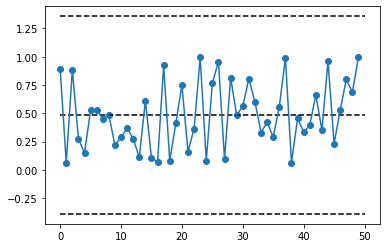

In [26]:
vnRand = np.random.rand(50)
plt.plot(range(50),vnRand)
plt.hlines([vnRand.mean(),vnRand.mean() + 3*vnRand.std(),vnRand.mean() - 3*vnRand.std()],0,50,linestyles='dashed')
plt.scatter(range(50),vnRand)

If the process is in control, all the plotted points should have an essentially random pattern. Methods for looking for sequences or nonrandom patterns can be applied to control charts as an aid in detecting out-of-control conditions.

There is a close connection between control charts and hypothesis testing. To illustrate this connection, suppose that the vertical axis in the plot above is the sample average $\bar{x}$. Now, if the current value of $x$ plots between the control limits, we conclude that the process mean is in control; that is, it is equal to the value $\mu_0$. On the other hand, if $x$ exceeds either control limit, we conclude that the process mean is out of control; that is, it is equal to some value $\mu_1 \neq 􏰀\mu_0$. In a sense, then, the control chart is a test of the hypothesis that the process is in a state of statistical control. A point plotting within the control limits is equivalent to failing to reject the hypothesis of statistical control, and a point plotting outside the control limits is equivalent to rejecting the hypothesis of statistical control. The hypothesis testing framework is useful in many ways, but there are some differences in viewpoint between control charts and hypothesis tests. For example, when testing statistical hypotheses, we usually check the validity of assumptions, whereas control charts are used to detect departures from an assumed state of statistical control. Furthermore, an assignable cause can result in many different types of shifts in the process parameters. For example, the mean could shift instantaneously to a new value and remain there (this is sometimes called a **sustained shift**); or it could shift abruptly; but the assignable cause could be short-lived and the mean could then return to its nominal or in-control value; or the assignable cause could result in a steady drift or trend in the value of the mean. Only the sus- tained shift fits nicely within the usual statistical hypothesis testing model.

One place where the hypothesis testing framework is useful is in analyzing the performance of a control chart. For example, we may think of the probability of type I error of the control chart (concluding the process is out of control when it is really in control) and the probability of type II error of the control chart (concluding the process is in control when it is really out of control). It is occasionally helpful to use the operating-characteristic curve of a control chart to display its probability of type II error. This would be an indication of the ability of the control chart to detect process shifts of different magnitudes. This can be of value in determining which type of control chart to apply in certain situations. 

Let us look at an example to illustrate. Let us consider the log return process on our stock. One approach would be to use data from the past 4 trading days to get an estimate for the mean and standard deviation, and then apply it to the 5th day. In reality we would do something more sophisticated to estimate $\mu$ and $\sigma$, but for the purpose of our example we keep it simple. 

Recall that using the central limit theorem the sample mean is normally distributed with standard deviation
$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$
where $n$ is the sample size. Thus we can assume that $100(1-\alpha)$ percent of the data is between $\bar{x} + Z_{\alpha/2}\sigma_{\bar{x}}$ and $\bar{x} - Z_{\alpha/2}\sigma_{\bar{x}}$. These two values will be our UCL and LCL.

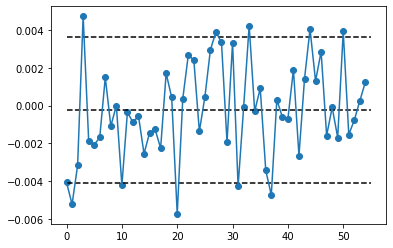

In [25]:
vnSampleMean = AAPL_10KTickbars_vol['log returns'].mean()
vnSampleStd = AAPL_10KTickbars_vol['log returns'].std()
nSampleSize = 4
nLength = len(AAPL_10KTickbars_vol['log returns'])
vnSampleMeanStd = vnSampleStd/math.sqrt(nSampleSize)
plt.plot(range(nLength),AAPL_10KTickbars_vol['log returns'])
plt.hlines([vnSampleMean,vnSampleMean + 3*vnSampleMeanStd,vnSampleMean - 3*vnSampleMeanStd],0,nLength,linestyles='dashed')
plt.scatter(range(nLength),AAPL_10KTickbars_vol['log returns'])

In [18]:
11/nLength*100

20.0

In [19]:
nLength

55

One of the issues that the control chart above highlights is the dangers of using asymptotic statistics. It is true that $\bar{x} \sim \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}})$ *in the limit*. But when do we actually have enough data to reach that limit? We never really do. It would probably be more appropriate to make a different distributional assumption to establish the UCL and LCL. We could also try an use some non-parametric approach.

For the chart shown above, where three-sigma control limits were used, if we assume that the mean is normally distributed, we find that the probability of type I error is 0.0027. That is, an incorrect out-of-control signal or false alarm will be generated in only 27 out of 10,000 points. Furthermore, the probability that a point taken when the process is in control will exceed the three-sigma limits in one direction only is 0.00135. The chart above shows that this is clearly not the case. This, again, makes us question distributional assumptions. Instead of specifying the control limit as a multiple of the standard deviation of x, we could have directly chosen the type I error probability and calculated the corresponding control limit. For example, if we specified a 0.001 type I error probability in one direction, then the appropriate multiple of the standard deviation would be 3.09. Again this assumes a normal distribution on $\bar{x}$. When done this way, these types of control limits are usually called **0.001 probability limits**.

Another important consideration in control chart usage is the type of variability exhibited by the process. The price process below illustrates nonstationary variation. This type of process data occurs frequently in finance. Note that the process is very unstable in that it drifts or “wanders about” without any sense of a stable or fixed mean. In many industrial settings, we stabilize this type of behavior by using **engineering process control** (such as **feedback control**).

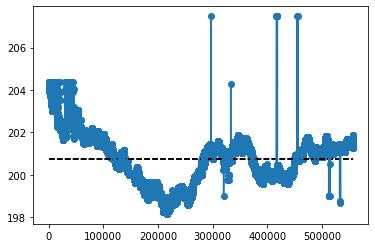

In [21]:
vnSampleMeanPrice = AAPL_timeindex['Trade Price'].mean()
vnSampleStdPrice = AAPL_timeindex['Trade Price'].std()
nSampleSizePrice = len(AAPL_timeindex['Trade Price'])
vnSampleMeanStdPrice = vnSampleStdPrice/math.sqrt(nSampleSizePrice)
plt.plot(range(nSampleSizePrice),AAPL_timeindex['Trade Price'])
plt.hlines([vnSampleMeanPrice,vnSampleMeanPrice + 3*vnSampleMeanStdPrice,
            vnSampleMeanPrice - 3*vnSampleMeanStdPrice],0,nSampleSizePrice,linestyles='dashed')
plt.scatter(range(nSampleSizePrice),AAPL_timeindex['Trade Price'])

In [22]:
[vnSampleMeanPrice,vnSampleStdPrice,vnSampleMeanStdPrice,vnSampleMeanPrice + 3*vnSampleMeanStdPrice]

[200.75696878933687,
 1.1415771266724506,
 0.0015299879726509613,
 200.76155875325483]

In designing a control chart, we must specify both the sample size and the frequency of sampling. In general, larger samples will make it easier to detect small shifts in the process. When choosing the sample size, we must keep in mind the size of the shift that we are trying to detect. If the process shift is relatively large, then we use smaller sample sizes than those that would be employed if the shift of interest were relatively small. We must also determine the frequency of sampling. The most desirable situation from the point of view of detecting shifts would be to take large samples very frequently; however, this is usually not feasible as a number of issues arise in finance. The general problem is one of allocating sampling effort. That is, either we take small samples at short intervals or larger samples at longer intervals.

One way to evaluate the decisions regarding sample size and sampling frequency is through the average run length (ARL) of the control chart. Essentially, the ARL is the average number of points that must be plotted before a point indicates an out-of-control condition. If the process observations are uncorrelated, then for any control chart, the ARL can be calculated easily from
$$ARL = \frac{1}{p}$$
where $p$ is the probability that any point exceeds the control limits. 

## The CUSUM Filter

This is a technique from statistical quality control which falls into the area of sequential analysis. It was first published in Page, E. S. (June 1954). "Continuous Inspection Scheme". Biometrika. 41. Sequential analysis contains many important ideas directly applicable to finance. It's first serious investigations were done by Abraham Wald, the gentleman resposible for the concept of survivor bias. Statistical process control is also an area very relevant to finance as seen above. We will investgate addtional concepts from both areas throughout the semester. 

Consider the process below where the first 20 samples are drawn from a $\mathcal{N}(10,1)$ and the last 10 samples are drawn from a $\mathcal{N}(11,1)$. Although the control chart shows that the process is in control, it is actually not since there has been a shift in the mean. The problem is the shift was small, $1\sigma$. None of these points plots outside the control limits, so we have no strong evidence that the process is out of control. Note that there is an indication of a shift in process level for the last 10 points, because all but one of the points plot above the center line. However, if we rely on the traditional signal of an out-of-control process, one or more points beyond a three-sigma control limit, then the Shewhart control chart has failed to detect the shift. The reason for this failure, of course, is the relatively small magnitude of the shift. For smaller shifts, it is not as effective. The cumulative sum (or CUSUM) control chart is a good alternative when small shifts are important.

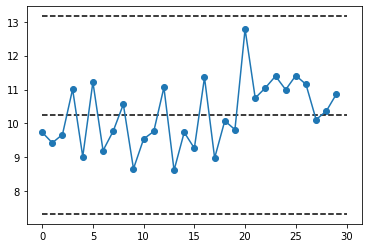

In [27]:
vnRand = np.concatenate((np.random.normal(10,1,20),np.random.normal(11,1,10)))
plt.plot(range(30),vnRand)
plt.hlines([vnRand.mean(),vnRand.mean() + 3*vnRand.std(),vnRand.mean() - 3*vnRand.std()],0,30,linestyles='dashed')
plt.scatter(range(30),vnRand)

Let us start by assuming we have some time series $\{y_t\}$ for $t=1,\ldots, T$ coming from some stationary process. CUSUM is implimented by defining a series of cumulative sums as follows
$$S_0 = 0$$
$$S_t = max\{0, S_{t-1} + y_t - \omega\}$$
Here $\omega$ is some weight. One common choice of weight is $E[y_{t-1}]$. Another is the likelihood function. We will use the simple choice $y_{t-1}$. As we stated above we want to detect some kind of structural change. To do this we want to track when $S_t$ breached some threshold or holding barrier $h$.

One issue with the implementation above is that we only care about breaching some upper level. We may be concerned about breaching some lower level as well. To this end we can use a symmetric CUSUM filter. 
$$S^+_0 = 0, \; S^-_0 = 0$$
$$S^+_t = max\{0, S^+_{t-1} + y_t - \omega\}$$
$$S^-_t = min\{0, S^-_{t-1} + y_t - \omega\}$$
$$S_t = max\{S^+_t, -S^-_t\}$$

In [31]:
def CusumEvents(series,breakout): 
    times,SPlus,SMinus = [],0,0 
    diff = series.diff()
    for i in diff.index[1:]:
        SPlus,SMinus=max(0,SPlus+diff.loc[i]),min(0,SMinus+diff.loc[i]) 
        if SMinus < -breakout:
            SMinus = 0
            times.append(i)
        elif SPlus > breakout:
            SPlus = 0
            times.append(i) 
    return pd.DatetimeIndex(times)

In [28]:
AAPL_1Minbars['log returns'].std()

0.0008709147799018835

In [29]:
AAPL_1Minbars

,open,high,low,close,Trade Volume,log returns
Date_Time,,,,,,
1900-01-01 09:31:00,204.39,204.39,203.02,203.2400,1328462,-0.005642
1900-01-01 09:32:00,203.26,204.39,202.28,202.4532,758040,-0.003977
1900-01-01 09:33:00,202.49,204.39,201.63,202.1100,903186,-0.001878
1900-01-01 09:34:00,202.16,204.39,201.70,202.4200,605879,0.001285
1900-01-01 09:35:00,202.42,204.39,202.39,203.1063,577415,0.003385
...,...,...,...,...,...,...
1900-01-01 16:12:00,NaN,NaN,NaN,NaN,0,NaN
1900-01-01 16:13:00,NaN,NaN,NaN,NaN,0,NaN
1900-01-01 16:14:00,NaN,NaN,NaN,NaN,0,NaN


In [32]:
events = CusumEvents(AAPL_1Minbars['log returns'],3*AAPL_1Minbars['log returns'].std())

In [33]:
events

DatetimeIndex(['1900-01-01 09:33:00', '1900-01-01 09:34:00',
               '1900-01-01 09:36:00', '1900-01-01 09:51:00',
               '1900-01-01 09:52:00', '1900-01-01 09:57:00',
               '1900-01-01 10:05:00', '1900-01-01 10:07:00',
               '1900-01-01 10:15:00', '1900-01-01 10:20:00',
               '1900-01-01 10:25:00', '1900-01-01 10:30:00',
               '1900-01-01 10:32:00', '1900-01-01 10:35:00',
               '1900-01-01 10:42:00', '1900-01-01 11:01:00',
               '1900-01-01 11:09:00', '1900-01-01 11:16:00',
               '1900-01-01 11:27:00', '1900-01-01 11:41:00',
               '1900-01-01 11:44:00', '1900-01-01 11:54:00',
               '1900-01-01 12:03:00', '1900-01-01 12:12:00',
               '1900-01-01 12:14:00', '1900-01-01 13:06:00',
               '1900-01-01 13:55:00', '1900-01-01 14:27:00',
               '1900-01-01 15:12:00'],
              dtype='datetime64[ns]', freq=None)

In [34]:
CumsumSample = AAPL_1Minbars.loc[events]
CumsumSample.index.name = "Date_Time"

In [35]:
CumsumSample

,open,high,low,close,Trade Volume,log returns
Date_Time,,,,,,
1900-01-01 09:33:00,202.4900,204.3900,201.6300,202.1100,903186,-0.001878
1900-01-01 09:34:00,202.1600,204.3900,201.7000,202.4200,605879,0.001285
1900-01-01 09:36:00,203.0800,204.3900,202.1700,202.9600,373268,-0.000591
1900-01-01 09:51:00,201.5200,202.0900,201.4900,201.9700,286694,0.002231
1900-01-01 09:52:00,201.9600,201.9799,201.5500,201.7000,230489,-0.001288
1900-01-01 09:57:00,201.5950,201.6200,201.1600,201.2041,326001,-0.001941
1900-01-01 10:05:00,200.3300,201.0000,200.3300,200.8699,473668,0.002691
1900-01-01 10:07:00,201.0600,201.1700,200.5300,200.8600,307349,-0.000995
1900-01-01 10:15:00,198.8600,199.6845,198.8100,199.2300,414962,0.001859


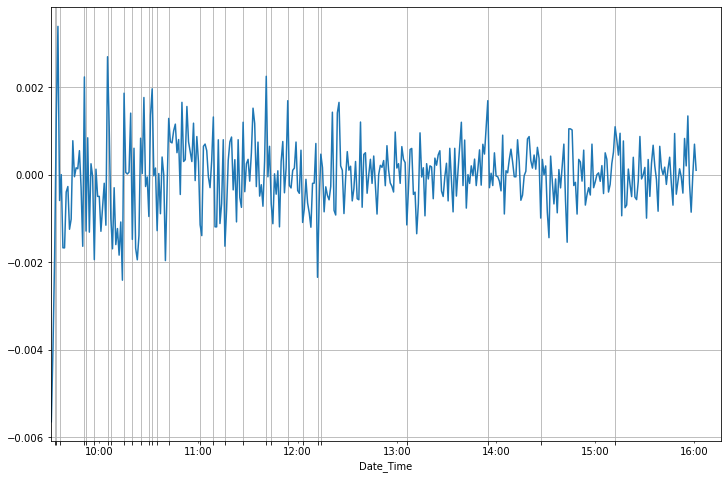

In [36]:
AAPL_1Minbars['log returns'].plot(kind='line',figsize=(12,8),xticks=CumsumSample.index,grid=True)

## EWMA Filter

The exponentially weighted moving average (EWMA) control chart is also a good alternative to the Shewhart control chart when we are interested in detecting small shifts. The perfor- mance of the EWMA control chart is approximately equivalent to that of the cumulative sum control chart, and in some ways it is easier to set up and operate. The EWMA control chart was introduced by Roberts (1959). See also Crowder (1987a, 1989) and Lucas and Saccucci (1990) for good discussions of the EWMA. The exponentially weighted moving average on a time series $\{x_t\}$, with forcasts $\{s_t\}$ is defined as
$$s_1 = \lambda x_0 + (1-\lambda)s_0$$
$$s_t = \lambda x_{t-1} + (1-\lambda)s_{t-1}$$
where $0<\lambda\leq1$ and $s_0$ is the initial condition. We typically take $s_0$ to be the process target, so perhaps $s_0 = \mu$. There are various approaches to estimating this. By applying the definition recursively we get
$$s_t = \lambda \sum_{i=1}^{t-1} (1-\lambda)^i x_{t-i} + (1-\lambda)^t s_0$$

The weights $\lambda(1-\lambda)^i$ decrease geometrically back in time. Also notice that
$$\lambda \sum_{i=1}^{t-1} (1-\lambda)^i = 1-(1-\lambda)^t \rightarrow \lambda \sum_{i=1}^{t} (1-\lambda)^i=1$$
The EWMA is used extensively in time series modeling and in forecasting (see Box, Jenkins, and Reinsel (1994) and Montgomery, Jennings, and Kulachi (2008)). Since the EWMA can be viewed as a weighted average of all past and current observations, it is very insensitive to the normality assumption. It is therefore an ideal control chart to use with individual observations. the EWMA control chart can be constructed by plotting $s_t$ versus the sample time $t$ using
$$UCL = s_0 + L \sigma \sqrt{\frac{\lambda}{2-\lambda}(1-(1-\lambda)^{2t})}$$
$$center \; line = s_0$$
$$LCL = s_0 - L \sigma \sqrt{\frac{\lambda}{2-\lambda}(1-(1-\lambda)^{2t})}$$

The parameters $L$ and $\lambda$ determine the width of the control limits. There are many approaches for how one chooses them. $L$ is typically just chosen as some desirable level of $\sigma$, say 3. The parameter $\lambda$ has a good interpretation as the model's half life $h$, i.e. the period at which the weight placed on an observation is half that of the initial weight. To see this take
$$(1-\lambda)^h = \frac{1}{2} \rightarrow \lambda = 1 - 2^{-1/h} \rightarrow h = -\frac{ln(2)}{ln(1-\lambda)}$$
Thus, a half-life of $h = 20$ periods (roughly a month for daily data) sets $\lambda \approx 0.034$, and a smoothing parameter $\lambda = 0.1$ sets the model's half life to $h \approx 6.6$ periods.

In [37]:
def EWMA(vnSeries,nlambda,szero,nL):
    s = [szero]
    sigma = vnSeries.std()
    UCL = [szero + nL*sigma*math.sqrt((nlambda/(2-nlambda)*(1-(1-nlambda))))]
    LCL = [szero - nL*sigma*math.sqrt((nlambda/(2-nlambda)*(1-(1-nlambda))))]
    
    for t in range(len(vnSeries)):
        st = nlambda*vnSeries[t] + (1 - nlambda)*s[t]
        s.append(st)
        UCL.append(szero + nL*sigma*math.sqrt((nlambda/(2-nlambda)*(1-(1-nlambda)**(2*t)))))
        LCL.append(szero - nL*sigma*math.sqrt((nlambda/(2-nlambda)*(1-(1-nlambda)**(2*t)))))
        
    return [s,UCL,LCL]
        

In [38]:
-np.log(2)/np.log(1-0.0068)

101.5864411909487

In [39]:
len(AAPL_1Minbars['log returns'])

406

In [40]:
vnEMA = EWMA(AAPL_1Minbars['log returns'],0.0068,AAPL_1Minbars['log returns'].mean(),3)

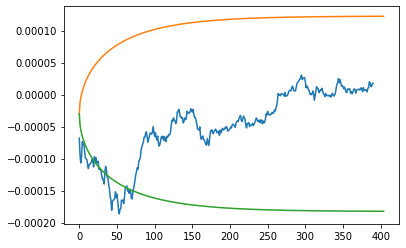

In [41]:
plt.plot(range(len(vnEMA[0][1:-1])),vnEMA[0][1:-1])
plt.plot(range(len(vnEMA[1][1:-1])),vnEMA[1][1:-1])
plt.plot(range(len(vnEMA[2][1:-1])),vnEMA[2][1:-1])

In [42]:
vnEMA2 = EWMA(AAPL_10KTickbars_vol['log returns'],0.0068,AAPL_10KTickbars_vol['log returns'].mean(),3)

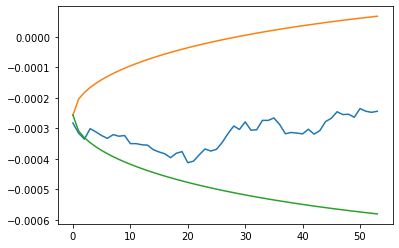

In [43]:
plt.plot(range(len(vnEMA2[0][1:-1])),vnEMA2[0][1:-1])
plt.plot(range(len(vnEMA2[1][1:-1])),vnEMA2[1][1:-1])
plt.plot(range(len(vnEMA2[2][1:-1])),vnEMA2[2][1:-1])

## Cumsum Squared

Recall that the definition of variance is given by
$$\sigma^2 = Var(x) = E[x^2] - E[x]^2$$
By removing the $E[x]^2$ we can get a more localized estimate of the variance.

In [48]:
AAPL_10KTickbars_vol['log returns'].mean()

-0.00025667180552923195

In [45]:
AAPL_10KTickbars_vol['log returns'].mean()**2

6.588041575363587e-08

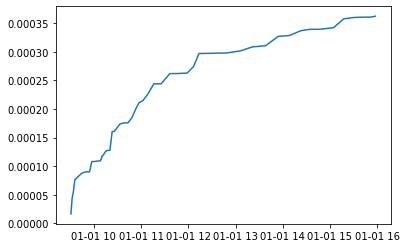

In [46]:
vnSquares = AAPL_10KTickbars_vol['log returns']**2
plt.plot(vnSquares.cumsum())

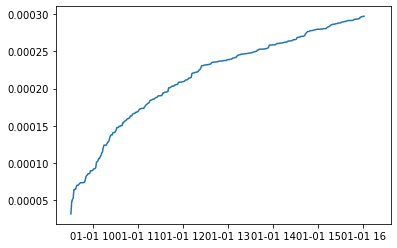

In [47]:
vnSquares = AAPL_1Minbars['log returns']**2
plt.plot(vnSquares.cumsum())